In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [5]:
# Now we will Normalize the data, means scaling it down so that every value is between 0 and 1

xtrain= tf.keras.utils.normalize(xtrain, axis =1)
xtest = tf.keras.utils.normalize(xtest, axis= 1)

In [6]:
 model = tf.keras.models.Sequential()   # which is basic sequentail model

In [7]:
#Now lets add some layers,
model.add( tf.keras.layers.Flatten(input_shape = (28,28)))  #Flatten layer means we faltten certain inputs shape - 28*28 = 784 , its convert into a line (da poyedo dapra)
model.add (tf.keras.layers.Dense(128, activation = 'relu'))
model.add (tf.keras.layers.Dense(128, activation = 'relu')) 
model.add (tf.keras.layers.Dense(10, activation = 'softmax')) # because this is going to be our output layer
          

In [8]:
model.compile (optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [38]:
model.fit (xtrain, ytrain, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0542 - accuracy: 0.9828
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0387 - accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0260 - accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0213 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0175 - accuracy: 0.9938
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0153 - accuracy: 0.9947
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0131 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0117 - accuracy: 0.9961
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 

In [39]:
model.save("HandWrittenRecognition.model")

INFO:tensorflow:Assets written to: HandWrittenRecognition.model\assets


In [40]:
model =tf.keras.models.load_model('HandWrittenRecognition.model')
loss, accuracy = model.evaluate (xtest, ytest)
print (loss)
print(accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.1226 - accuracy: 0.9759
0.12255337834358215
0.9758999943733215


###### low loss and High Accuracy

1/1 [==============================] - 0s 55ms/step
This Digit is a 3


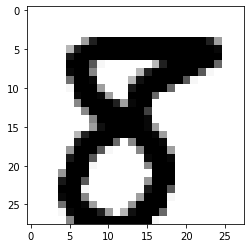

1/1 [==============================] - 0s 85ms/step
This Digit is a 4


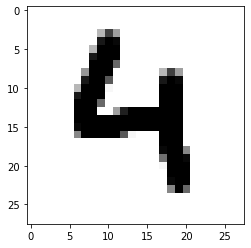

1/1 [==============================] - 0s 109ms/step
This Digit is a 3


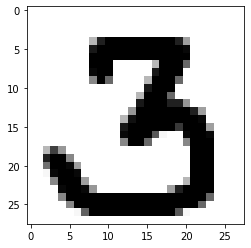

1/1 [==============================] - 0s 50ms/step
This Digit is a 8


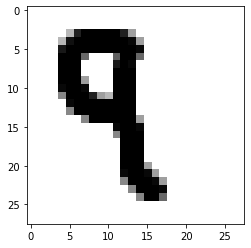

1/1 [==============================] - 0s 51ms/step
This Digit is a 6


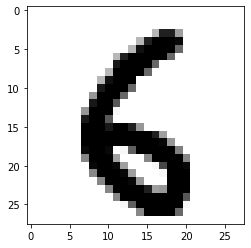

1/1 [==============================] - 0s 100ms/step
This Digit is a 2


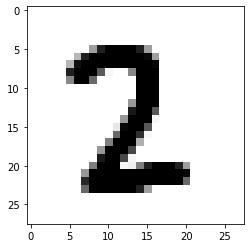

1/1 [==============================] - 0s 51ms/step
This Digit is a 8


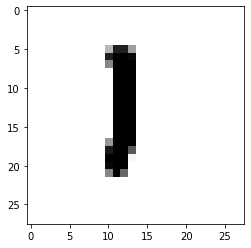

In [42]:
image_number = 1
while os.path.isfile(f"digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This Digit is a {np.argmax(prediction)}") #argmax gives the index of the field that has highest numbers
        plt.imshow(img[0], cmap = plt.cm.binary)
        plt.show()
    except:
        print("ERROR 404")
    finally:
        image_number += 1